### 서울 지하철 유/무임 승차 데이터

###### T-money 제공



###### 문제 1. 유임 승차 비율이 가장 높은 역은 어디일까

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('subwayfee.csv', encoding='cp949')
df.shape

(597, 8)

In [88]:
df = df.replace(',', '', regex=True)
df=df.dropna() # 누락값이 있는 행은 버린다

In [89]:
df.head(1)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
0,May-19,1호선,150,서울역,1568570,1489737,247801,242107


In [15]:
arr = np.array(df)
arr.shape

(597, 8)

In [27]:
arr[:,4], np.max(arr[:,4])
유임승차 = (arr[:,4].astype(np.int))
arr[np.argmax(유임승차),3], np.max(유임승차) , np.argmax(유임승차)

('강남', 2894341, 31)

In [28]:
# 유임승차 비율이 많은곳은? 유임승차인워/무임승차인워 = 유인승차 비율

In [35]:
무임승차 = (arr[:,6].astype(np.int) )
유임승차비율 = 유임승차/(무임승차+1)
arr[np.argmax(유임승차비율),1:4:2], np.max(유임승차비율) , np.argmax(유임승차비율)

(array(['분당선', '복정'], dtype=object), 24.0, 237)

- 유무임 승하차 인원이 가장 많은 역은 어디일까

In [46]:
x=arr[:, 4:8].astype(np.int)

In [47]:
x.shape

(597, 4)

In [71]:
x=np.sum(arr[:, 6:8].astype(np.int), 1)
np.max(x),  np.argmax(x), arr[np.argmax(x),1:4:2]
## 틀렸는데??

(791491, 3, array(['1호선', '종로3가'], dtype=object))

In [72]:
# 모든 역의 유무임 승하차 비율은 어떻게 될까>파일(유임승차 45%, 무임하차 x%)
# [유임승차인원:x, 유임 하차인원:x, 무임승차:x, 무임하차:x]

Text(0.5, 1.0, '전체 승하차 비율')

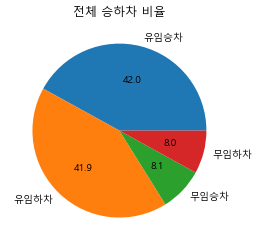

In [77]:
a = np.sum(arr[:, 4:8].astype(np.int), 0)
plt.rc('font', family='Malgun Gothic')
n = plt.pie( a, labels=df.columns[4:8], autopct='%.1f' )
plt.savefig('all_subway_ratio.png')
plt.title('전체 승하차 비율')

모든 역마다 유무임 승차 비율을 따로 파이 차트로 나타내기(50만명 이상)

In [79]:
a = narr[:, 4:8].astype(np.int), 0)
plt.rc('font', family='Malgun Gothic')
n = plt.pie( a, labels=df.columns[4:8], autopct='%.1f' )
plt.savefig('all_subway_ratio.png')
plt.title('전체 승하차 비율')

SyntaxError: invalid syntax (<ipython-input-79-057ae1a79601>, line 1)

In [83]:
arr[0]

array(['May-19', '1호선', 150, '서울역', '1568570', '1489737', '247801',
       '242107'], dtype=object)

In [87]:
for i in range(len(arr)):
    row = arr[i]
    승하차인원 = row[4:8]
    유임승차 = 승하차인원[0]
    if int(유임승차) > 1000000:
        print(row)
        plt.rc('font', family='Malgun Gothic')
        n = plt.pie( row[4:8], labels=df.columns[4:8], autopct='%.1f' )
        역이름 = row[3]
        파일명 = 'subway_' + 역이름 + '.png'
        plt.title(역이름+' 역의 유무임 승차 비율')
        plt.savefig(파일명)
        plt.close()

['May-19' '1호선' 150 '서울역' '1568570' '1489737' '247801' '242107']
['May-19' '1호선' 152 '종각' '1204910' '1151371' '176083' '164915']
['May-19' '2호선' 202 '을지로입구' '1458984' '1462646' '122625' '113191']
['May-19' '2호선' 212 '건대입구' '1378810' '1494957' '105074' '109681']
['May-19' '2호선' 214 '강변(동서울터미널)' '1310416' '1289645' '160160' '155742']
['May-19' '2호선' 216 '잠실(송파구청)' '2539574' '2462479' '233044' '219947']
['May-19' '2호선' 219 '삼성(무역센터)' '1781824' '1842623' '134802' '127716']
['May-19' '2호선' 220 '선릉' '1460528' '1300444' '234778' '207100']
['May-19' '2호선' 221 '역삼' '1269095' '1438098' '174383' '177850']
['May-19' '2호선' 222 '강남' '2894341' '2974378' '192979' '172755']
['May-19' '2호선' 226 '사당' '1171893' '1316118' '229867' '219309']
['May-19' '2호선' 228 '서울대입구(관악구청)' '1509438' '1455697' '222610' '213945']
['May-19' '2호선' 230 '신림' '1996054' '1926203' '266618' '270264']
['May-19' '2호선' 232 '구로디지털단지' '1810723' '1808076' '194678' '197938']
['May-19' '2호선' 234 '신도림' '1646558' '1650521' '234895' '223466']